# Numpy로 배우는 Linear algebra

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 정수 데이터 카운팅

In [3]:
# unique 함수는 중복된 값을 제거하고 중복되지 않는 값의 리스트를 출력
arr1 = np.unique([11, 11, 2,2, 34, 45])
print(arr1)

[ 2 11 34 45]


In [6]:
# index와 중복된 데이터의 갯수도 출력해준다
arr2 = np.array(['a', 'b', 'c', 'd', 'c', 'a'])
index, count = np.unique(arr2, return_counts=True)
print(index)
print(count)

['a' 'b' 'c' 'd']
[2 1 2 1]


In [8]:
# 난수 생성
arr3 = np.random.randint(0, 10, 100)
print(arr3)

print()
print(np.mean(arr3))  # 평균
print(np.var(arr3))   # 분산
print(np.std(arr3))   # 표준편차
print(np.max(arr3))   # 최댓값
print(np.min(arr3))   # 최솟값
print(np.median(arr3))# 중앙값

[9 1 6 9 6 3 2 0 6 6 8 3 1 5 0 6 9 1 7 0 6 5 8 7 9 4 1 5 5 1 4 4 6 5 2 3 2
 3 9 6 4 1 6 2 8 5 0 3 0 5 1 2 8 2 1 4 1 4 8 2 6 8 6 8 1 4 9 2 3 1 2 3 4 3
 8 3 8 3 5 3 5 7 7 9 9 9 6 4 7 7 7 5 6 5 0 2 4 1 7 9]

4.56
7.5264
2.7434285119171595
9
0
5.0


In [9]:
# 사분위수 : 작은수부터 큰 수까지 정렬했을 때 각각 1/4, 2/4, 3/4의 위치에 있는 수
np.percentile(arr3, 25)

2.0

In [12]:
# 사이킷런 데이터셋 가져오기
from sklearn.datasets import load_iris

iris = load_iris()  # 데이터셋 로드
iris.data[0,:]      # 0번째 columm data

array([5.1, 3.5, 1.4, 0.2])

In [16]:
arr4 = iris.data[1, :]
# 넘파이는 1차원 배열 객체도 벡터로 인정한다. 실제로는 열로 표현이 되는 것이다. 
arr4 = arr4.T

arr4

array([4.9, 3. , 1.4, 0.2])

In [20]:
# 연습문제 211, 붓꽅 데이터에 대한 벡터변수 만들기
x2 = iris.data

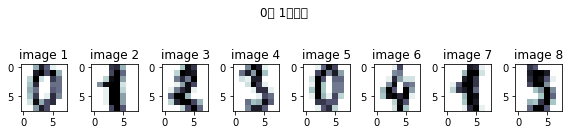

In [22]:
# 2차원 입력을 벡터화 된 이미지로 출력하기
from sklearn.datasets import load_digits

mnist = load_digits()
samples = [0, 1, 2, 3, 10, 4, 11, 5]
d = []

for i in samples:
    d.append(mnist.images[i])

plt.figure(figsize=(8, 2))
for i in range(8):
    plt.subplot(1,8, i+1)
    plt.imshow(d[i], interpolation='nearest', cmap=plt.cm.bone_r)
    plt.title('image {}'.format(i+1))
plt.suptitle('0과 1이미지')
plt.tight_layout()
plt.show()

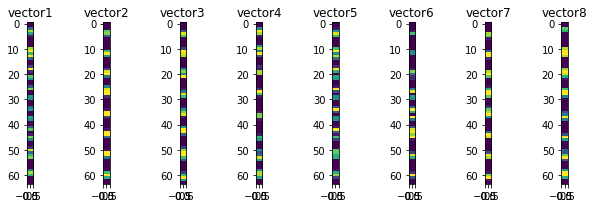

In [23]:
# 이미지를 64 크기의 1차원 벡터로 피기
v = []
for i in range(8):
    v.append(d[i].reshape(64,1))  # 64, 1의 형태로 벡터화 시키기 

plt.figure(figsize=(8,3))
for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(v[i], aspect=0.4, interpolation='nearest')
    plt.grid(False)
    plt.title('vector{}'.format(i+1))
plt.tight_layout(w_pad=7)
plt.show()

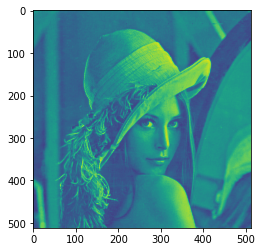

In [49]:
# 텐서는 2차원 이상을 나타내는 부분이라고 볼 수 있다.
from PIL import Image

img1 = Image.open('C:/Users/dudfh/Documents/영록/data/Lenna_image_ex.png')

img1 = np.array(img1)
plt.imshow(img1[:,:,2])

In [52]:
# 여러 가지 행렬의 형태
print(np.diag([1,2,3]))  # 대각 정방행렬
print(np.identity(3))    # 항등행렬
print(np.eye(3))         # 항등행렬을 만드는 다른 방법

[[1 0 0]
 [0 2 0]
 [0 0 3]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [54]:
# 벡터 행렬과 연산
x = np.array([10, 11, 12, 13])
y = np.array([1,2,3,4])

print(x + y)
print(x - y)

[11 13 15 17]
[9 9 9 9]


In [55]:
# Broad casting = 행렬의 차원이 다른 벡터에 대한 연산
# 데이터 분석에서는 원래의 데이터 벡터 x가 아닌 데이터 벡터의 평균값을 뺸 mean removed 벡터를 활용하는 경우가 많음
print(x - 10)

[0 1 2 3]


In [56]:
# 벡터의 내적, 
x.T @ y

120

In [57]:
# 연습문제 2.2.1
aa = np.array([100, 80, 50])
bb = np.array([3, 4,5])

aa.T @ bb

870

In [62]:
# 벡터의 유사도
# 유사도는 두벡터가 닮은 정도를 정량적으로 나타낸 값. 
# 내적을 통한 cos 유사도의 계산
v1 = v[1]
v2 = v[2]
v3 = v[3]

print(v1.T, end='')
print(v2.T, end='')
print(v3.T)
print(v1.T @ v2)
print(v1.T @ v3)

[[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]][[ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]][[ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.  8.  4.  5. 14.
   9.  0.  0.  0.  7. 13. 13.  9.  0.  0.]]
[[3432.]]
[[2547.]]


In [65]:
# 넘파이를 이용한 행렬 곱을 구할 때 @나 dot()을 사용한다
a = np.array([[1,2,3],[4,5,6]])
b = np.array([[1,2],[3,4],[5,6]])

print(a@b)
# print(a*b)  # 얘는 작동하지 않는다. 요소곱이기 때문
print(a.dot(b))

[[22 28]
 [49 64]]
[[22 28]
 [49 64]]


In [66]:
# 벡터의 이차형식, 행벡터 x 정방행렬 x 열벡터 
x = np.array([1,2,3])
A = np.arange(1, 10).reshape(3,3)

x.T @ A @ x

228

In [67]:
# 행렬의 놈 계산하기
np.linalg.norm(A, 2)  # 2차 놈

16.84810335261421

In [68]:
# 행렬의 대각합 계산하기
np.trace(np.eye(3))

3.0

In [69]:
# 행렬식(determinant 계산하기)
np.linalg.det(b.dot(a))


8.526512829121193e-14

In [73]:
# 전치행렬의 행렬식
a = np.random.randint(0, 10, (3,3))
print(a)
print(np.linalg.det(a))
print(np.linalg.det(a.T))

[[8 7 1]
 [6 5 0]
 [5 9 6]]
17.0
17.0


In [75]:
# 역행렬 구하기
Ainv = np.linalg.inv(a)
Ainv

array([[ 1.76470588, -1.94117647, -0.29411765],
       [-2.11764706,  2.52941176,  0.35294118],
       [ 1.70588235, -2.17647059, -0.11764706]])

In [80]:
# A를 통한 선형 연립방정식의 해를 구하는 방법
b = np.array([[2], [2], [3]])
x = Ainv @ b

print(x)
print(A@x - b)

# lstwq는 최소 자승 문제의 답 x와 잔차 제곱합 resid, 랭크, 특잇값을 반환한다.
x, resid, rank, s = np.linalg.lstsq(A, b)
print(x)
print(resid)
print(rank)
print(s)

[[-1.23529412]
 [ 1.88235294]
 [-1.29411765]]
[[-3.35294118]
 [-5.29411765]
 [-8.23529412]]
[[-0.69444444]
 [ 0.05555556]
 [ 0.80555556]]
[]
2
[1.68481034e+01 1.06836951e+00 4.41842475e-16]
